In [1]:
classes=[ 'Early_blight', 'Healthy', 'Late_blight','Leaf Miner', 'Magnesium Deficiency','Nitrogen Deficiency',  'Pottassium Deficiency', 'Spotted Wilt Virus']

In [2]:
import os
print(os.listdir("/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/train"))

['Magnesium Deficiency', 'Late_blight', 'Pottassium Deficiency', 'Early_blight', 'Spotted Wilt Virus', 'Healthy', 'Nitrogen Deficiency', 'Leaf Miner']


In [3]:
import pandas as pd
import numpy as np
import os
import sys
from shutil import copyfile
import os.path
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from PIL import Image
from sklearn.model_selection import train_test_split
from numpy import load
import matplotlib.pyplot as plt
imagegen = ImageDataGenerator()

# load train data from drive
train_generator=imagegen.flow_from_directory("/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/train", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224),seed=42 )
#print(labels)
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)
#Converting  our color images to a vector
print(y)
X_train=x.reshape(3162,224*224*3)

#Apply SMOTE method 
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train, y)
print(y_smote)
#Retrieve the image and save it to drive. Here's an example for a single image
Xsmote_img=X_smote.reshape(5728,224,224,3)
pil_img = array_to_img(Xsmote_img[80]* 255)
pil_img.save('/kaggle/working/hello.jpg')

#Save all images generated by the SMOTE method to the drive

train_sep_dir='/kaggle/working/tomato-village/'

#Create a "testfolder" if it does not exist on the drive
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

#This function return label name 
def get_key(val): 
    for key, value in patho.items(): 
         if val == value: 
            return key 

for i in range(len(Xsmote_img)):
  label=classes[(y_smote[i].argmax())]
  #print(label)
  if not os.path.exists(train_sep_dir + str(label)):
    os.mkdir(train_sep_dir + str(label))
  pil_img = array_to_img(Xsmote_img[i]* 255)
  pil_img.save(train_sep_dir + str(label) +'/'+ 'smote_'+ str(i) + '.jpg')

2024-02-25 14:03:15.300791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 14:03:15.300932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 14:03:15.622751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3162 images belonging to 8 classes.
(3162, 224, 224, 3)
(3162, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


['Pottassium Deficiency', 'Healthy', 'Nitrogen Deficiency', 'Magnesium Deficiency', 'Spotted Wilt Virus', 'Late_blight', 'Leaf Miner', 'Early_blight']


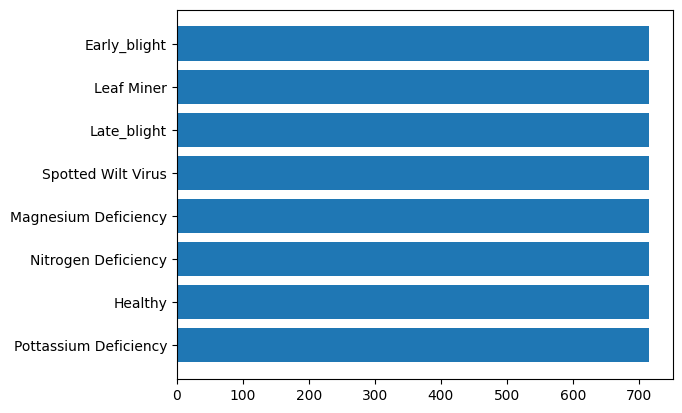

In [4]:
labels=[]
counts=[]
path="/kaggle/working/tomato-village/"
for i in os.listdir(path):
    labels.append(i)
    counts.append(len(os.listdir(path+i)))

plt.barh(labels,counts,align="center")
print(labels)

Found 5728 images belonging to 8 classes.


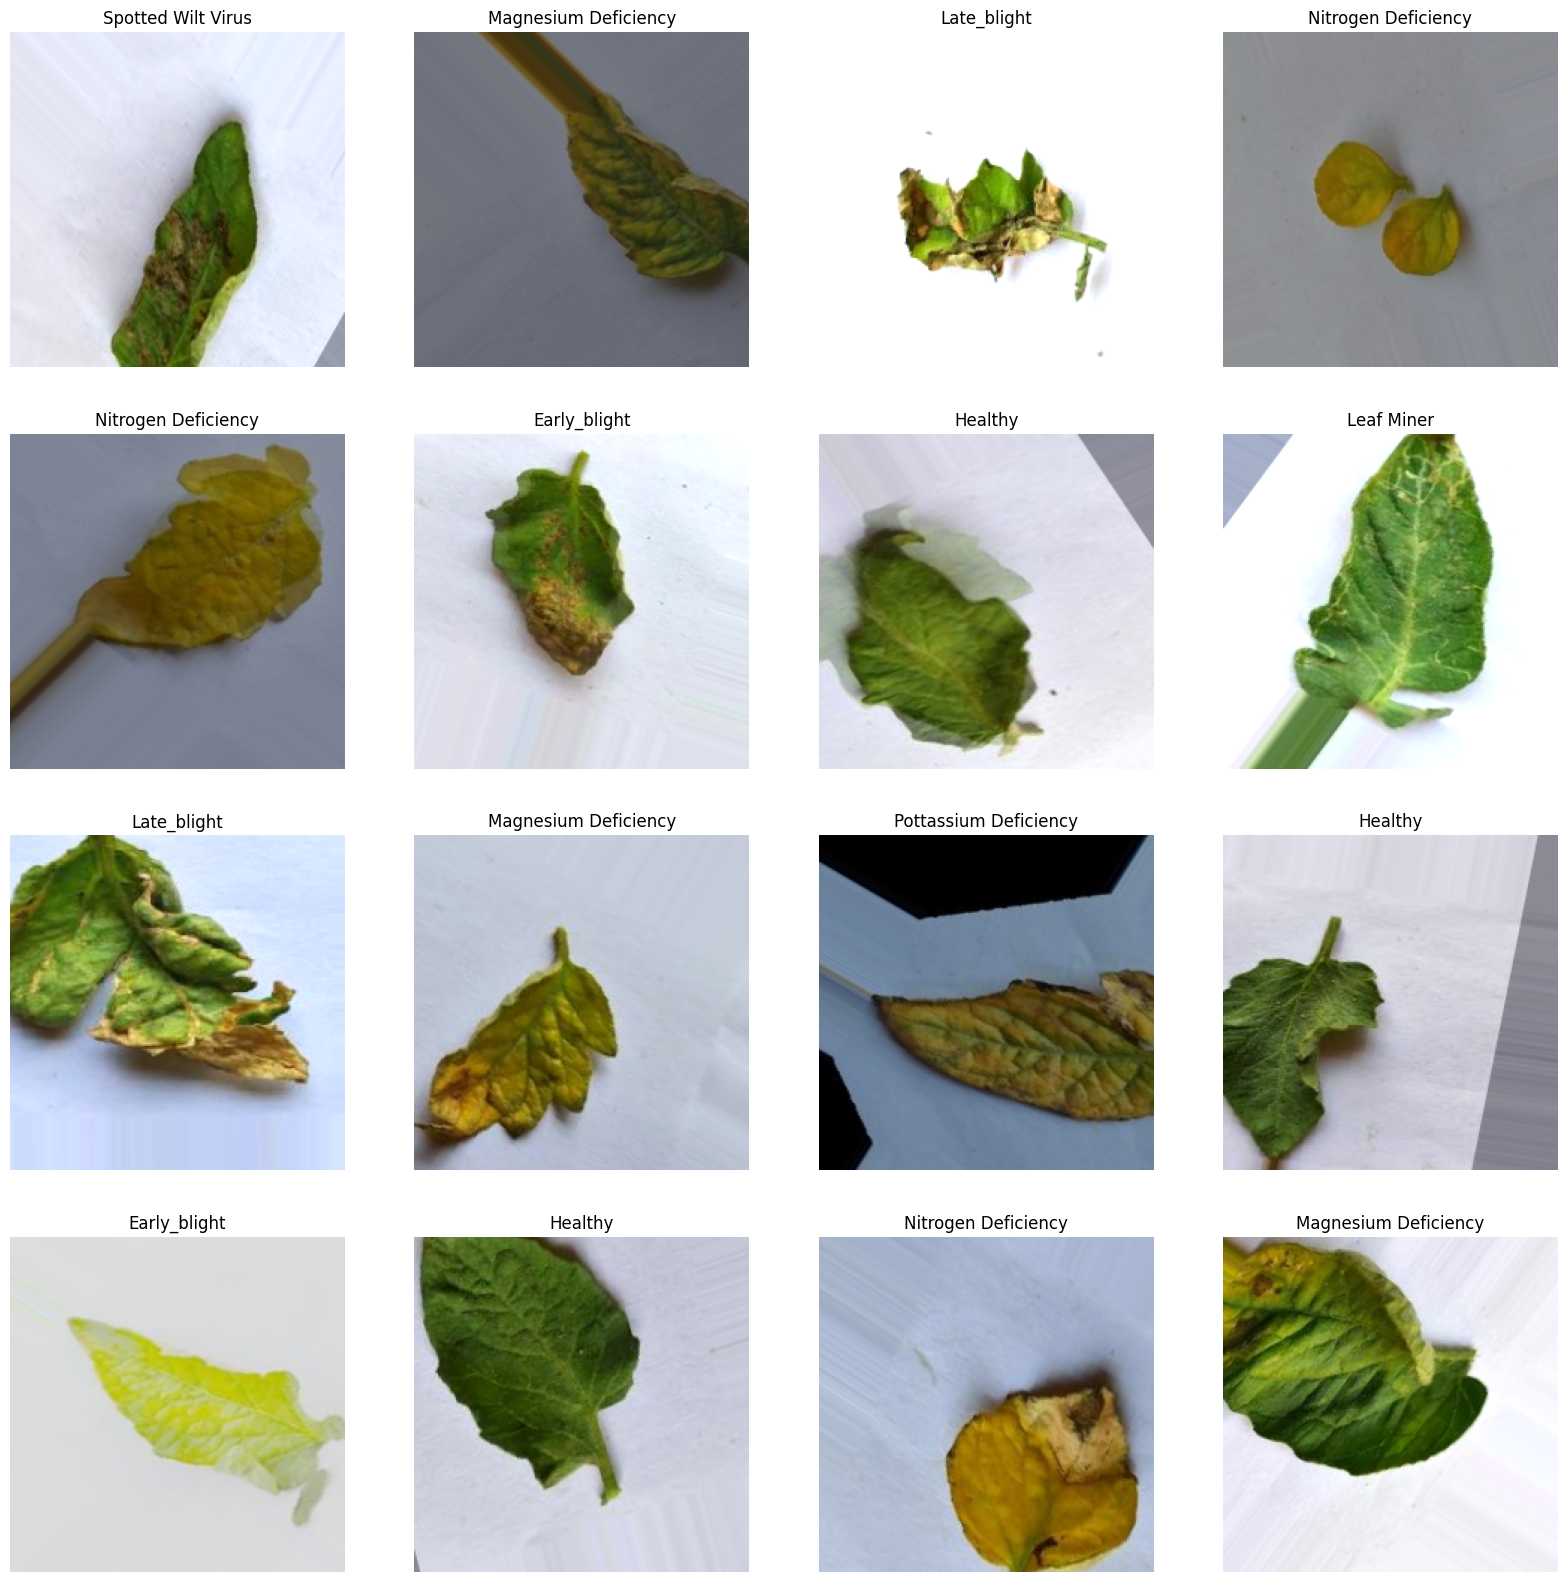

In [5]:
from keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],  # Adjust brightness
    channel_shift_range=0.2,  # Introduce channel shifts
    fill_mode='nearest',  # Fill mode for new pixels
    validation_split=0.04
)
train_generate,label=next(training_data_generator.flow_from_directory(path, target_size=(224,224), batch_size=16, shuffle=True))
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_generate[i])
    ax.axis('off')
    ax.set_title(classes[label[i].argmax()])
plt.show()

In [6]:
import pandas as pd
import numpy as np
import os
import sys
from shutil import copyfile
import os.path
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from PIL import Image
from sklearn.model_selection import train_test_split
from numpy import load
import matplotlib.pyplot as plt
imagegen = ImageDataGenerator()

# load train data from drive
train_generator=imagegen.flow_from_directory("/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/train", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224),seed=42 )
#print(labels)
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)
#Converting  our color images to a vector
print(y)
X_train=x.reshape(3162,224*224*3)

#Apply SMOTE method 
from imblearn.over_sampling import ADASYN
sm = ADASYN(sampling_strategy="minority")
X_smote, y_smote = sm.fit_resample(X_train, y)
print(y_smote)
#Retrieve the image and save it to drive. Here's an example for a single image
Xsmote_img=X_smote.reshape(3816,224,224,3)
pil_img = array_to_img(Xsmote_img[80]* 255)
pil_img.save('/kaggle/working/hello_ada.jpg')

#Save all images generated by the SMOTE method to the drive

train_sep_dir='/kaggle/working/tomato-village-Adasyn/'

#Create a "testfolder" if it does not exist on the drive
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

#This function return label name 
def get_key(val): 
    for key, value in patho.items(): 
         if val == value: 
            return key 

for i in range(len(Xsmote_img)):
  label=classes[(y_smote[i].argmax())]
  #print(label)
  if not os.path.exists(train_sep_dir + str(label)):
    os.mkdir(train_sep_dir + str(label))
  pil_img = array_to_img(Xsmote_img[i]* 255)
  pil_img.save(train_sep_dir + str(label) +'/'+ 'smote_'+ str(i) + '.jpg')

Found 3162 images belonging to 8 classes.
(3162, 224, 224, 3)
(3162, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


['Pottassium Deficiency', 'Healthy', 'Nitrogen Deficiency', 'Magnesium Deficiency', 'Spotted Wilt Virus', 'Late_blight', 'Leaf Miner', 'Early_blight']
[704, 151, 251, 654, 361, 632, 716, 347]


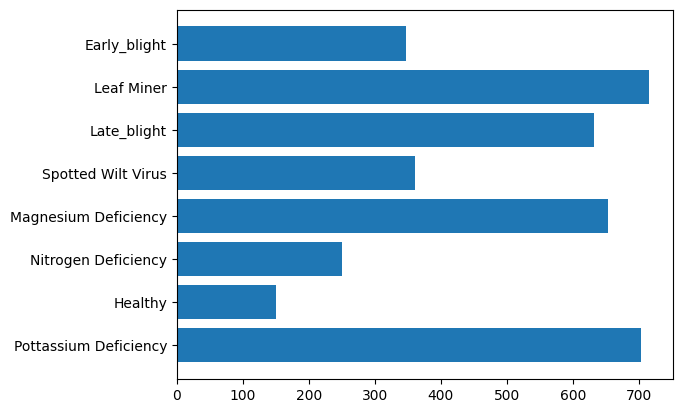

In [7]:
labels=[]
counts=[]
path="/kaggle/working/tomato-village-Adasyn/"
for i in os.listdir(path):
    labels.append(i)
    counts.append(len(os.listdir(path+i)))

plt.barh(labels,counts,align="center")
print(labels)
print(counts)